<a href="https://colab.research.google.com/github/Ryoma-HCU/Prog2kakushin/blob/main/work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numpyを用いた課題プログラムの作成

最初に下記のコードを実行して，必要なライブラリをインストールする．

In [2]:
pip install pydub

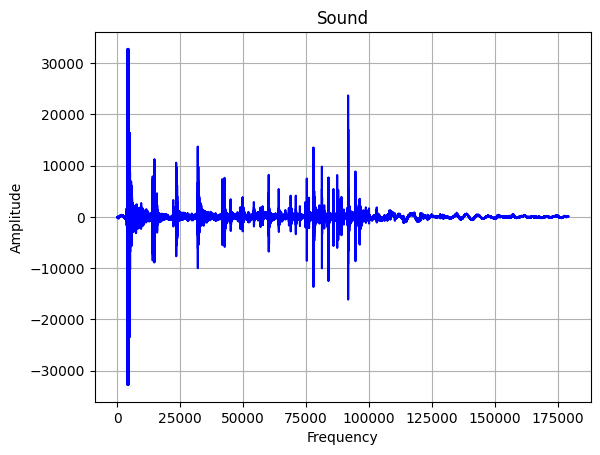

調べたい周波数帯域を入力してください(自然数)
下限1
上限100

調べたい入力音声の範囲を入力してください(0～179200)
下限75000
上限85000



<function matplotlib.pyplot.show(close=None, block=None)>

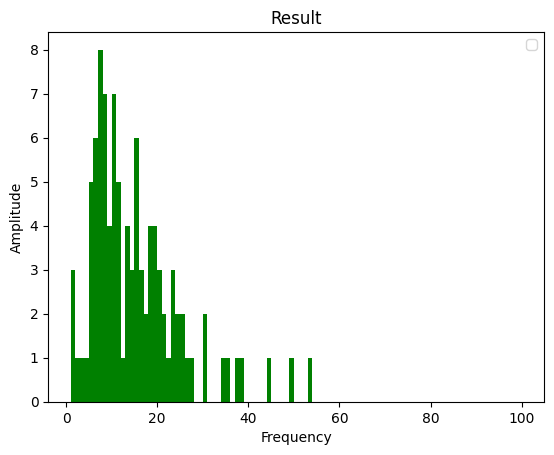

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from pydub import AudioSegment

#fname = input("読み込みたいファイル名を入力してください：")
#extension = input("拡張子名を入力してください：")

#サンプルファイルのダウンロード
#エラー処理

# 時間領域グラフ出力
sound = AudioSegment.from_file("pencil_roll.mp3", "mp3")
#sound = AudioSegment.from_file(str(fname)+"."+str(extension), str(extension))
f = sound.get_array_of_samples()

plt.plot(f, c="b", label="")
plt.title("Sound")
#plt.title(str(fname))
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

amp = np.array([])

#数値エラー処理(自然数・上限下限逆)・できればHz変換
print("調べたい周波数帯域を入力してください(自然数)")
band_low = int(input("下限"))
band_up = int(input("上限"))
print()
print("調べたい入力音声の範囲を入力してください(0～"+str(len(f))+")")
range_low = int(input("下限"))
range_up = int(input("上限"))
print()

# 周波数領域グラフ出力
T = range_up - range_low
for n in range(band_low, band_up+1):
  a_n = 0
  b_n = 0
  for x in range(range_low, range_up):
    a_n += np.cos(2*n*x*np.pi/T)*(f[x]+f[x+1])/2
    b_n += np.sin(2*n*x*np.pi/T)*(f[x]+f[x+1])/2
  a_n = a_n*2/T
  b_n = b_n*2/T
  amp = np.append(amp, np.sqrt(a_n**2+b_n**2))

#範囲みやすく・最大振れ幅/周波数表示
plt.hist(amp, range=(band_low, band_up), bins=(int(band_up)-int(band_low)), label="", color="g")
plt.legend()
plt.title("Result")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show